<a href="https://colab.research.google.com/github/JackQuane/C-Programs1/blob/master/Jack_copy_of_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 1

Provide answers to the problems in the boxes provided.  Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/gpfeiffer/cs4423) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [0]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

##  1. Warmup.

The purpose of this task is to get you used to working with the `networkx` package
in the `jupyter` notebook environment.

1. Define a new (simple) graph `G` on the vertex set $X = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
with edges $0-1$, $1-2$, $2-3$, $3-4$, $4-5$, $5-6$, $6-7$, $7-8$, $8-9$, and $9-0$.
Draw the graph.  Hence or otherwise determine its **order** (the number of nodes)
and its **size** (the number of links).

10
10


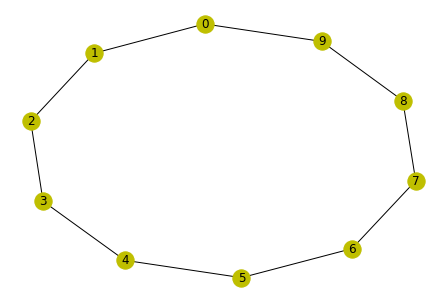

In [0]:
G = nx.Graph(["01", "12", "23", "34", "45", "56", "67", "78", "89", "90"])
nx.draw(G, **opts)
print(G.size())
print(G.order())

2. Find the **adjacency matrix** $A$ of the graph `G`.  Then compute its square, $A^2$,
and draw the graph `G2` that has $A^2$ as its adjacency matrix.  What are the connected components of `G2`? 

In [0]:
import numpy as np
A = nx.adjacency_matrix(G)
print(A.todense())
Asquared=A*A
np.from_numpy_matrix(Asquared)




[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


AttributeError: ignored

##  2.  Projections

Suppose that $G$ is a bipartite graph on a vertex set that is the disjoint union of two sets $X$ and $Y$, where each edge
connects a verte in $X$ to a vertex in $Y$.  The **projection** of $G$ onto the set $X$
is the graph with vertex set $X$, where any two elements are joined by an edge whenever
they are joined to a common element $y \in Y$ in the graph $G$.  
The adjacency matrix of the projection can be derived from the square $A^2$ of the adjacency matrix
$A$ of $G$.

Consider the affilliation network below, with $11$ people labelled $A$ to $K$,
and four foci labelled $1$, $2$, $3$ and $4$, 

![bipartite graph](https://github.com/gpfeiffer/cs4423/blob/master/images/bipartite.png?raw=1)

1.  Compute the adjacency matrix of $G$.

2. Draw the projection on (just)
   the people, in which two people are joined by an edge if they have a common
   focus.
   (Of course, one can do this easily by hand.  It would be nice to get
   `networkx` to do it for you.)

3. Compute the adjacency matrix $B$ of the projection
   and compare it to $A^2$.  What do you observe?

In [0]:
A = nx.adjacency_matrix(G)


... text goes here ...

## 3. Random Trees

The `nx.random_tree(n)` command can be used to generate a random tree on the `n` vertices
represented in `python` by `range(n)`.

Such a tree can be converted into a sequence of $n - 2$ numbers, its **Prüfer code** by the
`python` function `pruefer_code`, defined as follows:

In [0]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

def pruefer_code(T):
    tree = T.copy()
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

In [0]:
T = nx.random_tree(12)

In [0]:
code = pruefer_code(T)
code

[2, 2, 9, 0, 11, 0, 1, 5, 10, 8]

Conversely, the following function `tree_pruefer` constructs a tree from a
Prüfer code.

In [0]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    defects = [1 for x in tree]
    for y in code:
        defects[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if defects[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    defects[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if defects[x] == 1]
    tree.add_edge(*e)
    
    return tree

In [0]:
T2 = tree_pruefer(code)

1. Construct a few random trees on $n = 10, 11, 12, \ldots$ nodes.  For each such tree,
   draw it, compute its Prüfer code and then convert the code back into a tree.
   Do you get your old tree back?

2. For a few randomly chosen Prüfer codes, construct the corresponding tree, 
   draw it if you want, and convert it back into a Prüfer code.
   Do you get your olc code back?
   
3. Which tree on $n$ nodes corresponds to the Prüfer code 
   consisting of $n-2$ entries $0$?

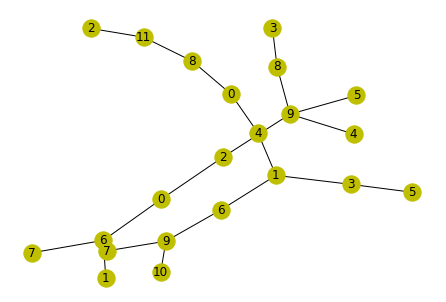

In [0]:
T10 = nx.random_tree(10)
T11 = nx.random_tree(11)
T12 = nx.random_tree(12)
nx.draw(T10, **opts)
# nx.draw(T11, **opts)
# nx.draw(T12, **opts)
code = pruefer_code(T10)
code = pruefer_code(T11)
code = pruefer_code(T12)
T10 = tree_pruefer(code)
T11 = tree_pruefer(code)
T12 = tree_pruefer(code)
nx.draw(T10, **opts)
# nx.draw(T11, **opts)
# nx.draw(T12, **opts)



1. No, 2. 

## 4. Breadth First Search.

Breadth First Search (BFS) is a versatile and efficient strategy for systematically visiting
all the nodes in a graph.

Given a graph $G = (X, E)$ and a starting point $x \in X$, BFS can be described as the following sequence of steps.

1. mark all nodes of $G$ as "unseen".

2. initialize a list `seen = [x]` and mark `x` as seen.

3. loop over the elements `y` in the list `seen` and, in each step, visit the
   node `y` and add all of `y`'s neighbors that have not been marked as "seen"
   to the list `seen` and mark them as seen.


### For Example

Consider the graph on the vertex set `"ABCDEFGHIJ"`
defined in the nearby file `data/bfs.adj` by adjacency lists.

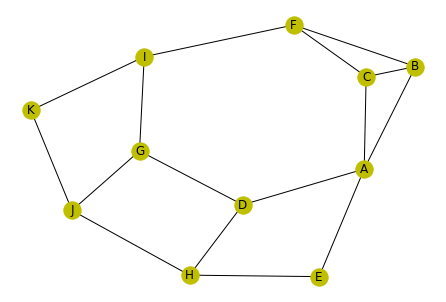

In [10]:
# G = nx.read_adjlist("data/bfs.adj")
# G = ['AB','AC','AD','AE','BC','BF','CF','DG','DH','EH','FI','GI','GJ','HJ','IK','JK']
G = nx.Graph(['AB','AC','AD','AE','BC','BF','CF','DG','DH','EH','FI','GI','GJ','HJ','IK','JK'])
nx.draw(G, **opts)

Let's say we want to start exploring the graph at vertex `'A'`

In [0]:
x = 'A'

**Step 1.** For each of its nodes `x`, the graph object `G` maintains in `G.nodes[x]` a `python` dictionary
that can be used store arbirary attributes of the nodes.  We can use it for an attribute `'seen'`,
which is set to `True` or `False`, depending on whether the node has already been seen by this instance 
of BFS, or not.  Initially it would be false for all nodes.

In [12]:
G.nodes[x]

{}

In [0]:
for y in G:
    G.nodes[y]['seen'] = False

**Step 2.** Initialize a `python` list `seen` to contain `x` only, and set `x`'s `'seen'` attribute to `True`.

In [0]:
seen = [x]
G.nodes[x]['seen'] = True

**Step 3.**  The loop over `seen`.  For each node `y` in the list, print `y`, then
add all of `y`'s unseen neighbors to the end of the list `seen` and mark them
as `"seen"`.  Note how the list `seen` initially has only one element, but grows
over time, until no more new nodes are detected.  
The loop automatically terminates when the end of the list `seen` has been reached.

In [15]:
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

A
B
C
D
E
F
G
H
I
J
K


In a variant of the same BFS strategy, on can construct a tree on the vertex set $X$ that
records the history of how the nodes in the graph $G$ were discovered.

In [0]:
x = 'A'

We set up an empty graph `T` to eventually contain the tree.

In [0]:
T = nx.Graph()

From here it's essentially the same procedure as above ...

In [0]:
for y in G:
    G.nodes[y]['seen'] = False

... except that we need to add the initial vertex `x` to `T` ...

In [0]:
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

... and instead of printing `y`, we add the edges leading to `y`'s children to the tree `T`.

In [0]:
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True

The resulting tree `T` is called a **spanning tree** of the graph `G`.

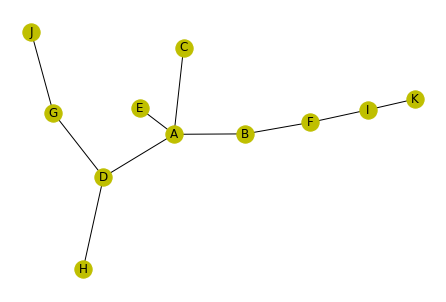

In [21]:
nx.draw(T, **opts)

1. Print out all the nodes of `G` as discovered when the starting point is node `B`.
2. Construct a spanning tree of the graph `G` with node `B` as starting point.
3. Repeat 1 and 2 for one more starting node.
4. Is there a sense of distance between nodes that becomes apparent through these traversals?
   Could a variant of BFS be used to compute such distances between nodes in `G`?

B
A
C
F
D
E
I
G
H
K
J


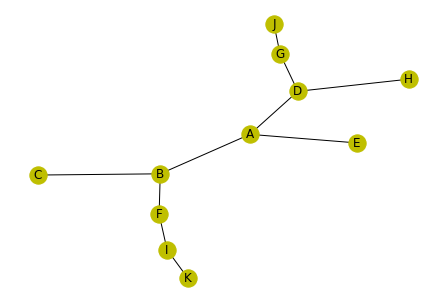

In [26]:
x = 'B'
G.nodes[x]
for y in G:
    G.nodes[y]['seen'] = False
seen = [x]
G.nodes[x]['seen'] = True
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

T = nx.Graph()
for y in G:
    G.nodes[y]['seen'] = False
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True
nx.draw(T, **opts)

 ... text goes here ...